In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
import math
import itertools

In [2]:
df_col = pd.read_excel('C:/Users/aperezl/OneDrive - kumo2 (1)/Escritorio/Icesi/Proyecto/Colocacion_creditos.xlsx')

In [3]:
print(df_col.shape)

print('-'*100)

print(df_col.columns)

print('-'*100)

print(df_col.head(5))

df_col.info()

print('-'*100)

df_col.describe()

(20188, 16)
----------------------------------------------------------------------------------------------------
Index(['zona', 'coficina', 'noficina', 'credito', 'id', 'nombre', 'finicio',
       'analista', 'saldo', 'monto', 'plazo', 'vcuota', 'tasa', 'producto',
       'tipo', 'fproxpago'],
      dtype='object')
----------------------------------------------------------------------------------------------------
   zona  coficina   noficina       credito            id              nombre  \
0     1         1  PRINCIPAL  001MH0109358  1.343595e+07  ALDEMAR MENDEZ RIV   
1     1         1  PRINCIPAL  001PG1200252  6.684842e+07  LUZ AMANDA DIAZ RI   
2     1         1  PRINCIPAL  001PG1200253  1.010138e+09  Danna Catalina Ort   
3     1         1  PRINCIPAL  001PG1200254  1.495966e+07  MIGUEL GERARDO ENR   
4     1         1  PRINCIPAL  001PG1200255  1.118871e+09           LIZA LARA   

     finicio analista    saldo    monto  plazo  vcuota   tasa producto   tipo  \
0 2020-10-31      DP

,zona,coficina,id,finicio,saldo,monto,plazo,vcuota,tasa,fproxpago
count,20188.000000,20188.000000,2.017900e+04,20188,2.018800e+04,2.018800e+04,20188.000000,2.018800e+04,20188.000000,20188
mean,9.601397,68.412324,3.704563e+08,2024-10-11 21:59:10.069348096,6.751769e+06,6.760624e+06,26.346196,2.626036e+05,36.964688,2024-11-28 10:11:04.790964992
min,1.000000,1.000000,1.664890e+05,2020-10-31 00:00:00,1.249390e+05,9.707560e+05,1.000000,1.364400e+04,20.160000,2024-10-31 00:00:00
25%,5.000000,33.000000,2.737406e+07,2024-10-10 00:00:00,1.784634e+06,1.784634e+06,15.000000,9.943925e+04,35.880000,2024-11-17 00:00:00
50%,9.000000,62.000000,5.200819e+07,2024-10-20 00:00:00,3.469776e+06,3.469776e+06,24.000000,1.687080e+05,38.880000,2024-11-20 00:00:00
75%,14.000000,103.000000,1.036397e+09,2024-10-27 00:00:00,6.977341e+06,6.987220e+06,36.000000,3.111785e+05,39.480000,2024-12-03 00:00:00
max,19.000000,150.000000,9.011840e+09,2024-10-31 00:00:00,9.993297e+07,9.993297e+07,59.000000,6.232332e+06,44.880000,2025-08-02 00:00:00
std,5.573298,42.100731,4.944772e+08,NaN,9.277491e+06,9.285700e+06,13.375693,2.791272e+05,3.959651,NaN


Cuartiles de 'zona':
 - Q1 (25%): 5.00
 - Q2 (Mediana, 50%): 9.00
 - Q3 (75%): 14.00

Cuartiles de 'coficina':
 - Q1 (25%): 33.00
 - Q2 (Mediana, 50%): 62.00
 - Q3 (75%): 103.00

Cuartiles de 'saldo':
 - Q1 (25%): 1784634.00
 - Q2 (Mediana, 50%): 3469776.00
 - Q3 (75%): 6977340.75

Cuartiles de 'monto':
 - Q1 (25%): 1784634.00
 - Q2 (Mediana, 50%): 3469776.00
 - Q3 (75%): 6987220.00

Cuartiles de 'plazo':
 - Q1 (25%): 15.00
 - Q2 (Mediana, 50%): 24.00
 - Q3 (75%): 36.00

Cuartiles de 'vcuota':
 - Q1 (25%): 99439.25
 - Q2 (Mediana, 50%): 168708.00
 - Q3 (75%): 311178.50



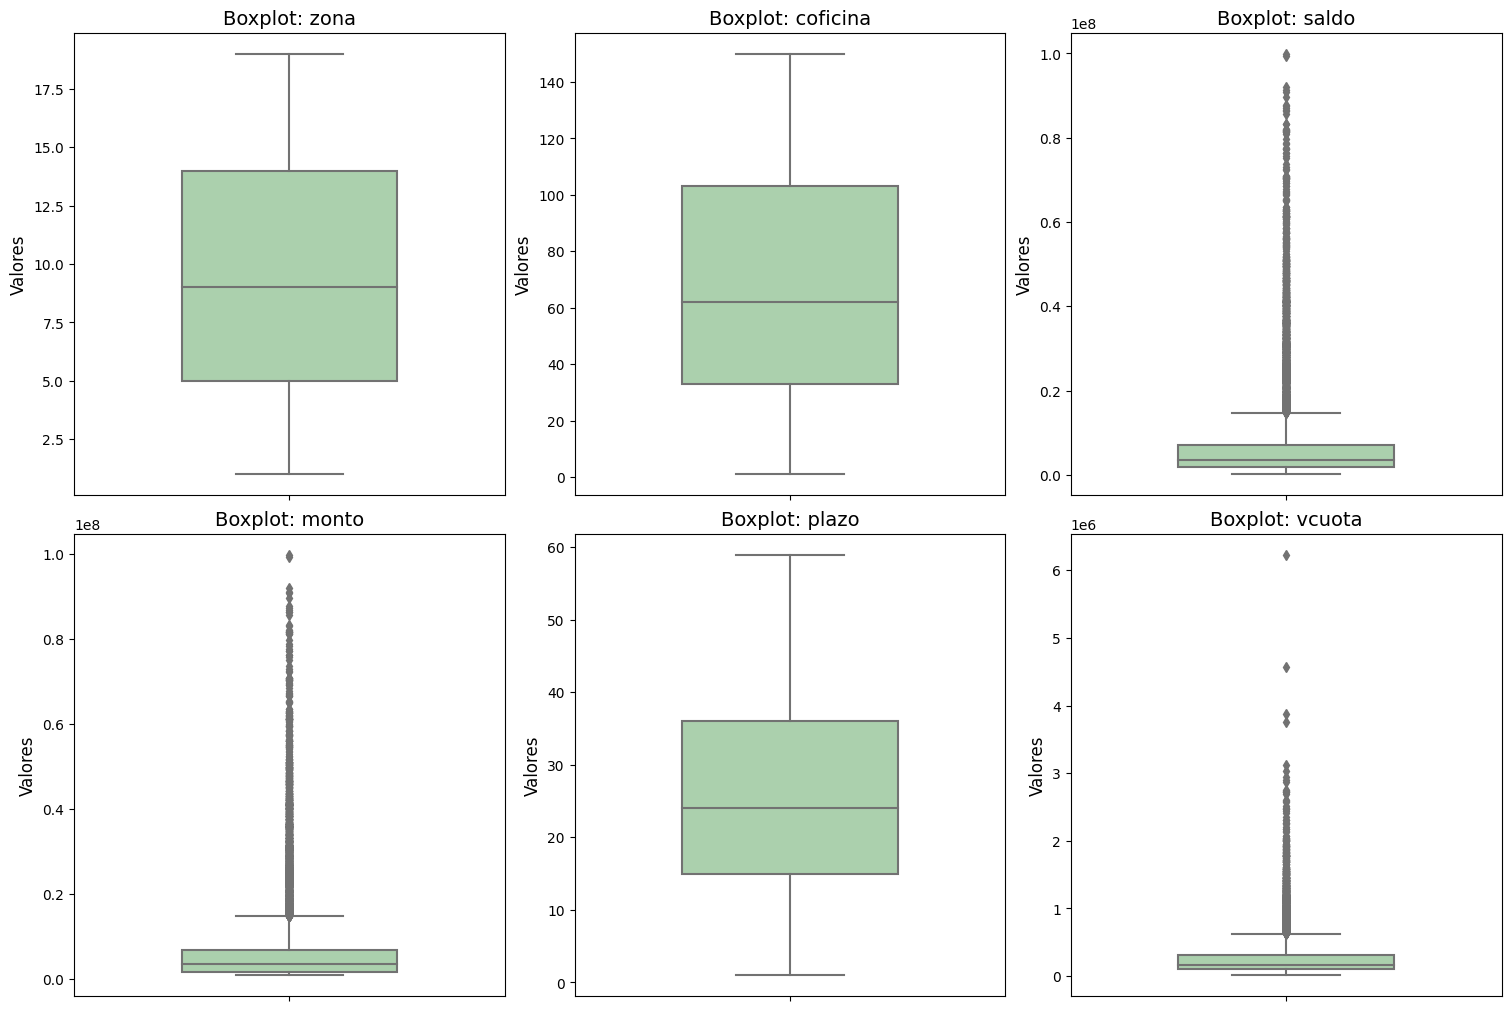

In [4]:
# Filtrar las columnas de tipo int
columnas_int = df_col.select_dtypes(include=['int64']).columns

# Calcular y mostrar cuartiles para cada columna
cuartiles = {}
for columna in columnas_int:
    cuartiles[columna] = df_col[columna].quantile([0.25, 0.5, 0.75]).to_dict()
    print(f"Cuartiles de '{columna}':")
    print(f" - Q1 (25%): {cuartiles[columna][0.25]:.2f}")
    print(f" - Q2 (Mediana, 50%): {cuartiles[columna][0.5]:.2f}")
    print(f" - Q3 (75%): {cuartiles[columna][0.75]:.2f}")
    print("")

# Crear una figura con subgráficos
num_columnas = len(columnas_int)
num_filas = math.ceil(num_columnas / 3)  # Calcular el número de filas necesarias (máx. 3 columnas por fila)
fig, axes = plt.subplots(nrows=num_filas, ncols=3, figsize=(15, 5 * num_filas), constrained_layout=True)

# Aplanar los ejes para un acceso más sencillo
axes = axes.flatten()

# Generar los boxplots
for i, columna in enumerate(columnas_int):
    sns.boxplot(data=df_col, y=columna, ax=axes[i], color='#A5D6A7', width=0.5)
    axes[i].set_title(f'Boxplot: {columna}', fontsize=14)
    axes[i].set_ylabel('Valores', fontsize=12)

# Eliminar los ejes vacíos si sobran subgráficos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Mostrar el gráfico completo con los subgráficos
plt.show()


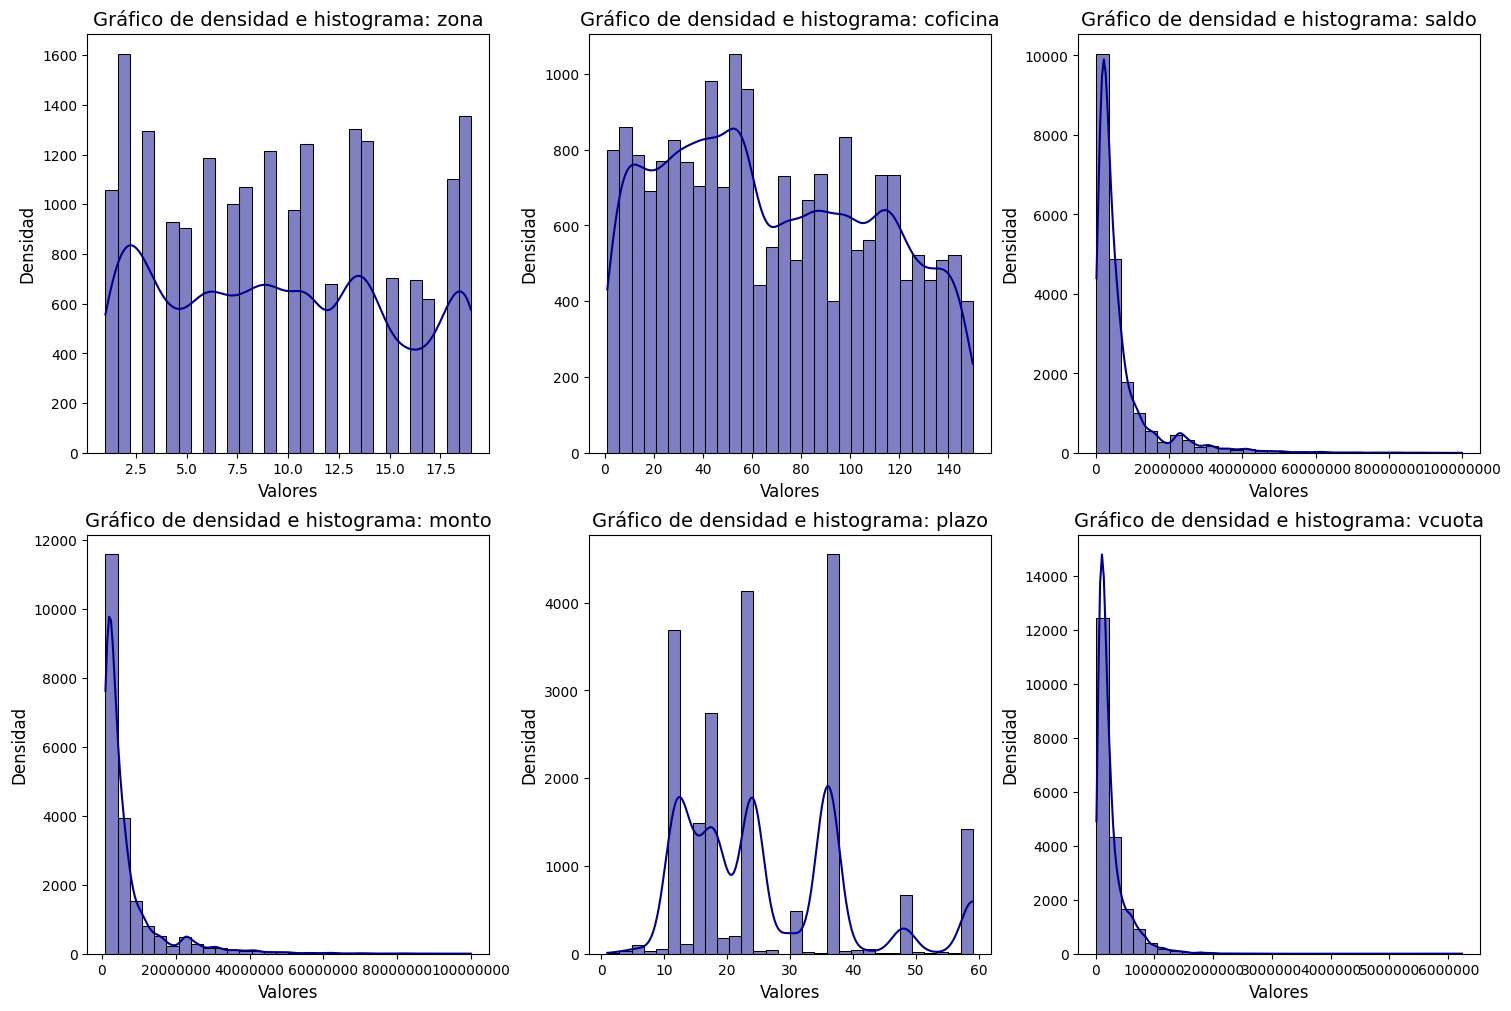

In [5]:
# Crear una figura con subgráficos
num_columnas = len(columnas_int)
num_filas = math.ceil(num_columnas / 3)  # Calcular el número de filas necesarias (máx. 3 columnas)
fig, axes = plt.subplots(nrows=num_filas, ncols=3, figsize=(15, 5 * num_filas), constrained_layout=True)

# Aplanar el arreglo de ejes para un acceso más simple
axes = axes.flatten()

# Iterar sobre las columnas y graficarlas
for i, columna in enumerate(columnas_int):
    sns.histplot(df_col[columna], kde=True, bins=30, color='darkblue', ax=axes[i], edgecolor='black')
    axes[i].set_title(f'Gráfico de densidad e histograma: {columna}', fontsize=14)
    axes[i].set_xlabel('Valores', fontsize=12)
    axes[i].set_ylabel('Densidad', fontsize=12)
    axes[i].ticklabel_format(style='plain', axis='x')  # Evitar notación científica en eje X

# Eliminar los ejes vacíos (si hay más subgráficos que columnas)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Mostrar el gráfico completo con los subgráficos
plt.show()


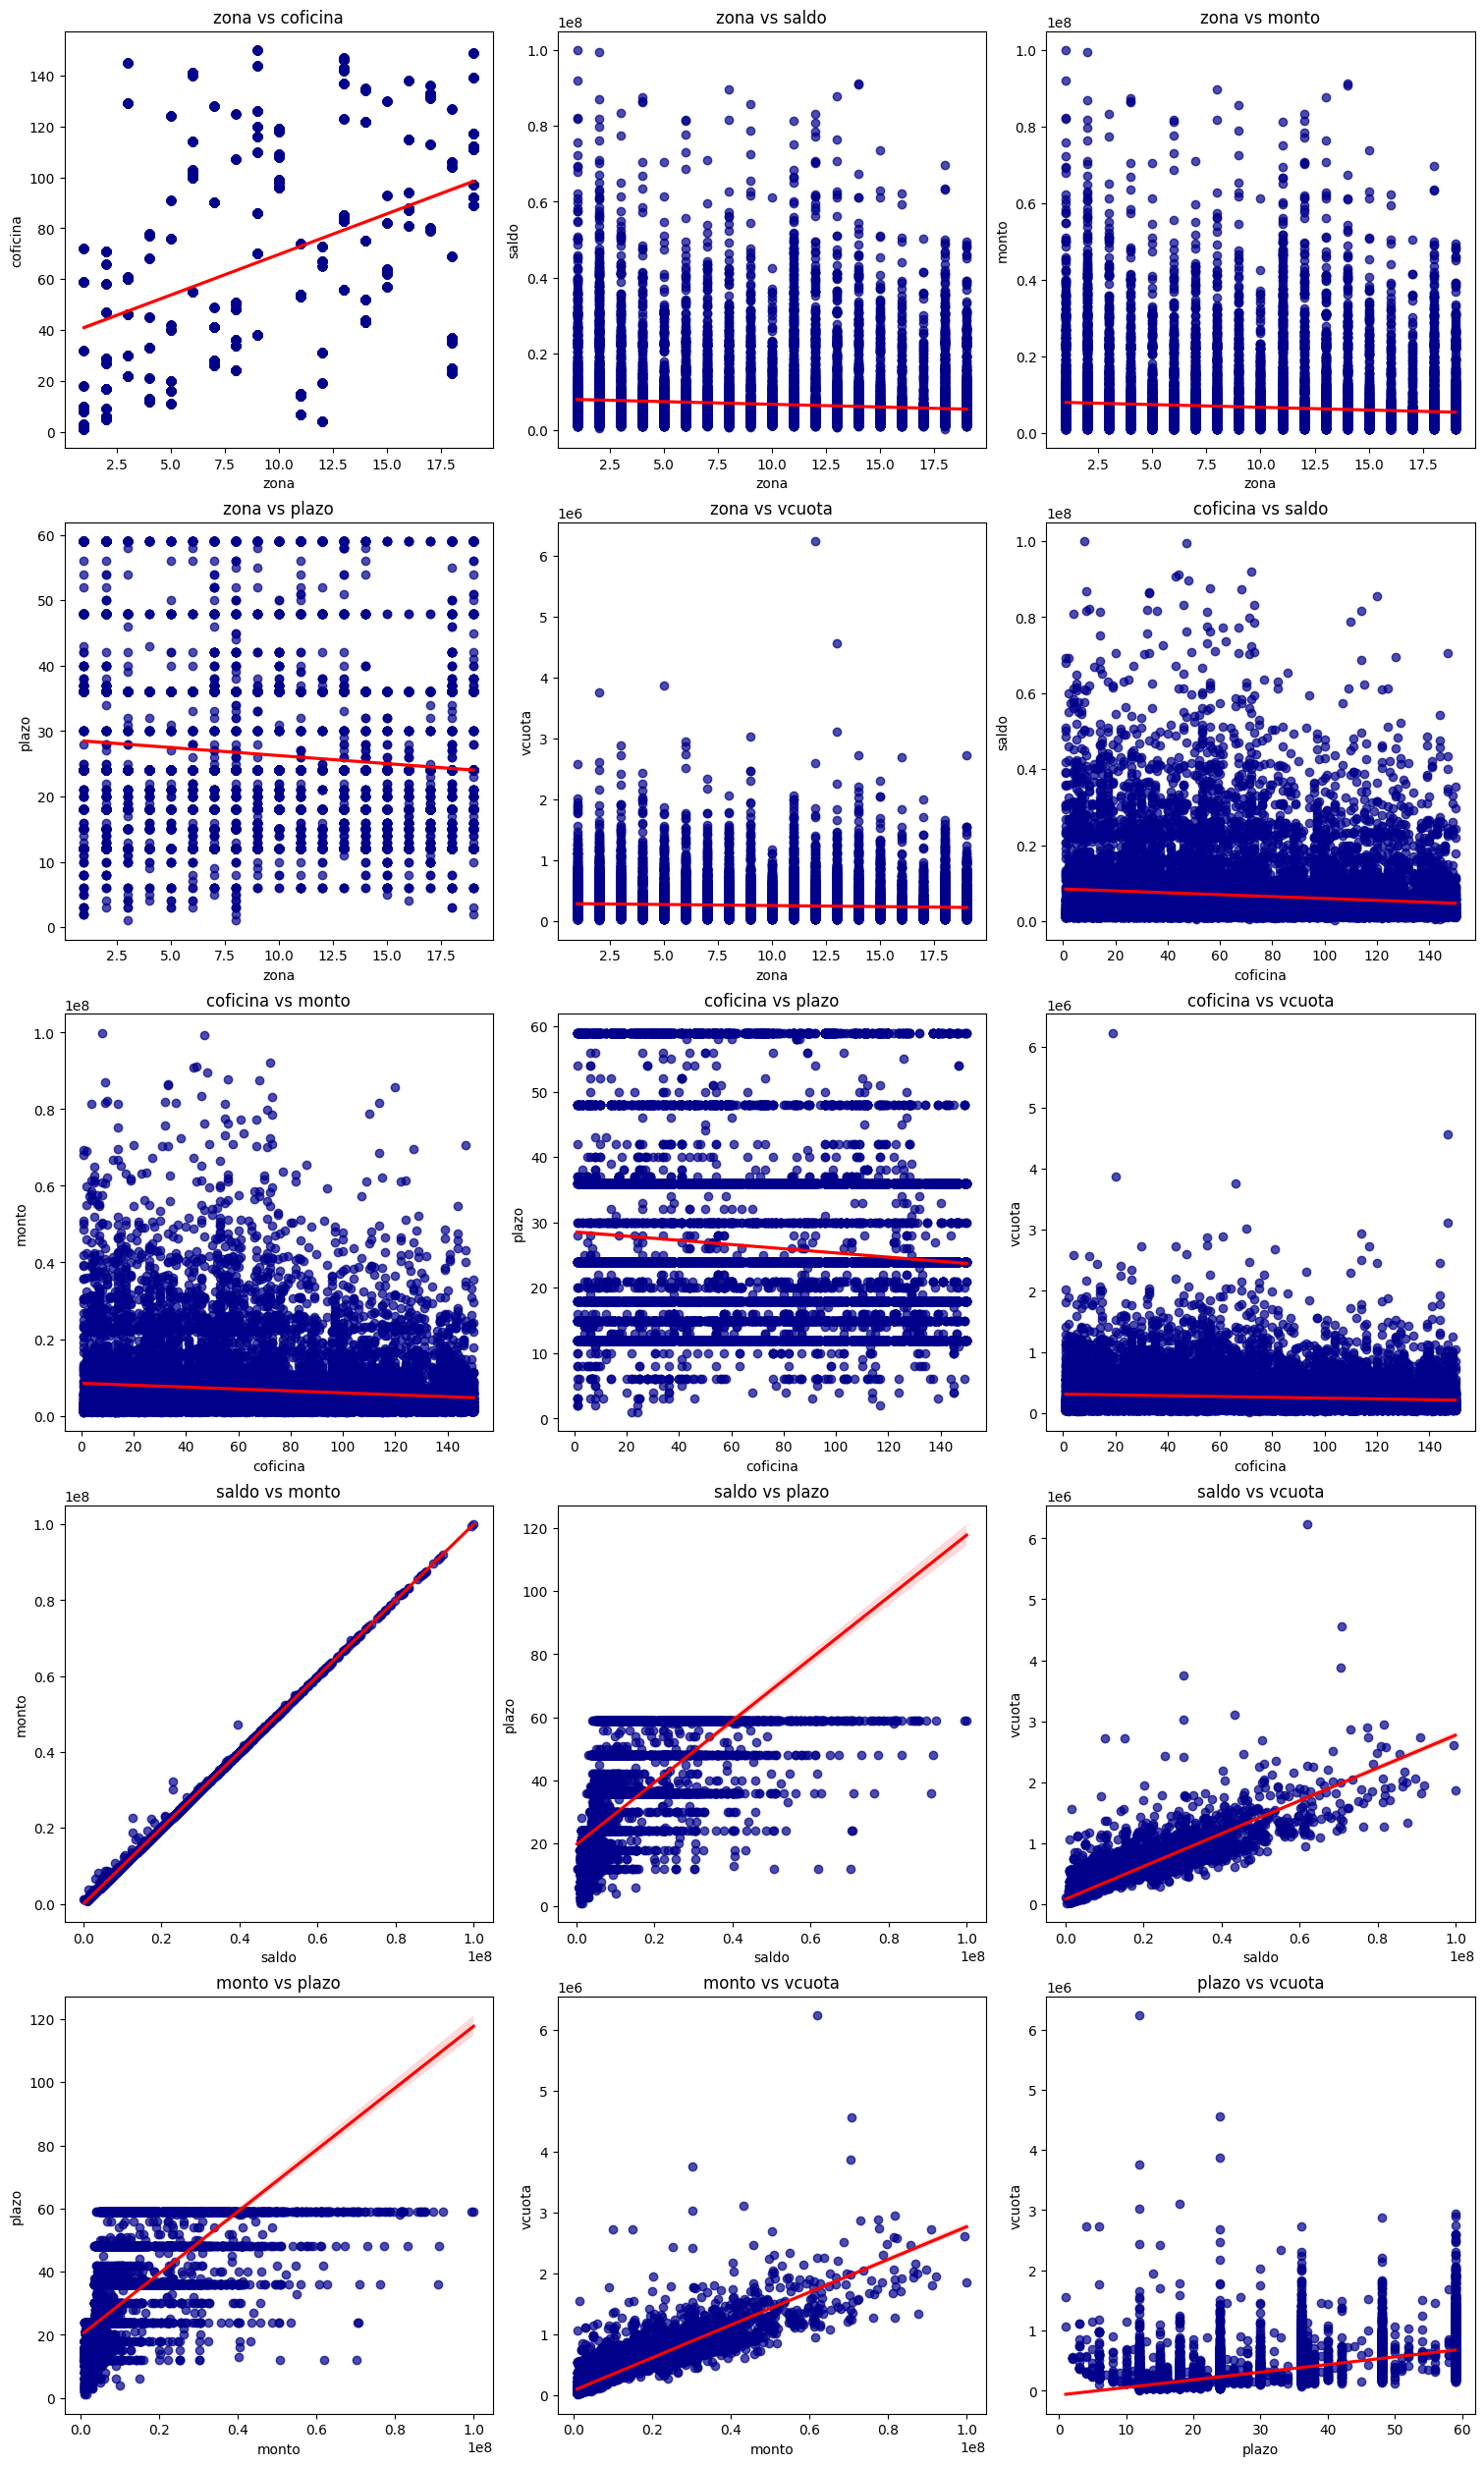

In [8]:
# Obtener todas las combinaciones de dos columnas
combinaciones = list(itertools.combinations(columnas_int, 2))

# Calcular las filas y columnas necesarias para subgráficos
num_graficos = len(combinaciones)
num_filas = math.ceil(num_graficos / 3)  # Máximo 3 columnas por fila
fig, axes = plt.subplots(nrows=num_filas, ncols=3, figsize=(15, 5 * num_filas), constrained_layout=True)

# Aplanar los ejes para un acceso más sencillo
axes = axes.flatten()

# Crear gráficos de dispersión para cada combinación con línea de tendencia
for i, (x_col, y_col) in enumerate(combinaciones):
    sns.regplot(data=df_col, x=x_col, y=y_col, ax=axes[i], color='darkblue', scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})
    axes[i].set_title(f'{x_col} vs {y_col}', fontsize=12)
    axes[i].set_xlabel(x_col, fontsize=10)
    axes[i].set_ylabel(y_col, fontsize=10)

# Eliminar ejes vacíos si hay menos combinaciones que subgráficos
for j in range(len(combinaciones), len(axes)):
    fig.delaxes(axes[j])

# Mostrar la figura
plt.show()


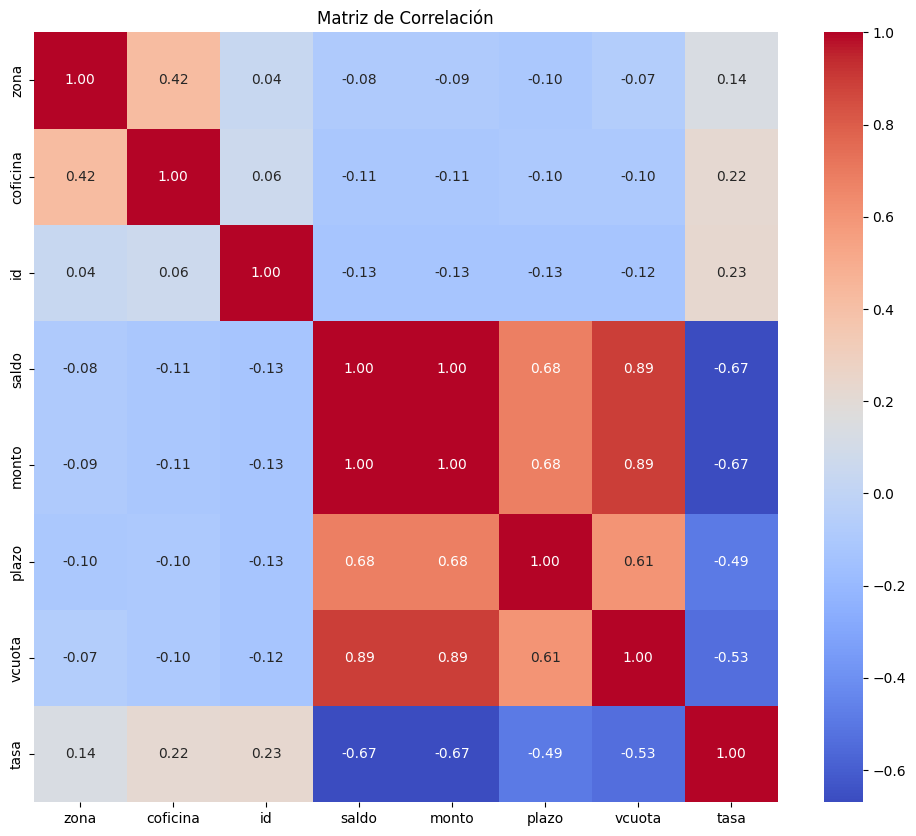

In [9]:
# Seleccionar solo las columnas numéricas
numeric_df = df_col.select_dtypes(include='number')

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Mostrar el mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()